# Project 3 - Part 2.2 - EDA 

- Name: Tyler Schelling
- Date Started: 12/21/2022

---

## Specifications

- Load in your csv.gz's of results for each year extracted.
    1. Concatenate the data into 1 dataframe for the remainder of the analysis.
- Once you have your data from the API, they would like you to perform some light EDA to show:
    1. How many movies had at least some valid financial information (values > 0 for budget OR revenue)?
        - Please exclude any movies with 0's for budget AND revenue from the remaining visualizations.
    2. How many movies are there in each of the certification categories (G/PG/PG-13/R)?
    3. What is the average revenue per certification category?
    4. What is the average budget per certification category?
    
---

## Import Libraries

In [1]:
import math
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.lines as lines
import matplotlib.patches as patches
from matplotlib.patheffects import withStroke

import warnings
warnings.filterwarnings("ignore")

In [2]:
pd.set_option('display.float_format', lambda x: '%.0f' % x)

## Functions

In [3]:
#Barplot creation function based on the economist style plot
#Source: https://www.python-graph-gallery.com/web-horizontal-barplot-with-labels-the-economis
BLUE = "#076fa2"
RED = "#E3120B"
GREY = "#a2a2a2"

def create_barplot(y, counts, names, df, desc, title='Movies'):
    
    fig, ax = plt.subplots(figsize=(12, 7))
    sns.barplot(x=counts, y=names, data=df, orient="h", color=BLUE, ax=ax)
    
    if math.ceil(df.max()) > 10000:
        max_range = math.ceil(df.max()/10000000)*10000000
        div = int(round(max_range/10,-1))
        label_update= True
    else:
        div = 15
        label_update = False

    ax.xaxis.set_ticks([i * div for i in range(0, 12)])
    ax.xaxis.set_ticklabels([i * div for i in range(0, 12)], size=16, 
                            fontfamily='sans-serif', fontweight=150)
    ax.xaxis.set_tick_params(labelbottom=False, labeltop=True, length=0)
    
    ax.set_xlim((0, div*10))
    
    if label_update == True:
        xlabels = ['${:,.0f}M'.format(x) for x in ax.get_xticks()/1000000]
        ax.set_xticklabels(xlabels)

    # Set whether axis ticks and gridlines are above or below most artists.
    ax.set_axisbelow(True)
    ax.grid(axis = "x", color="#A8BAC4", lw=1.2)
    ax.spines["right"].set_visible(False)
    ax.spines["top"].set_visible(False)
    ax.spines["bottom"].set_visible(False)
    ax.spines["left"].set_lw(1.5)
    # This capstyle determines the lines don't go beyond the limit we specified
    ax.spines["left"].set_capstyle("butt")

    # Hide y labels
    ax.yaxis.set_visible(False)
    
    PAD = 0.6
    for name, count, y_pos in zip(names, df[counts], y):
        x = 0
        color = "white"
        path_effects = None
        if count < 8:
            x = count
            color = BLUE    
            path_effects=[withStroke(linewidth=6, foreground="white")]

        ax.text(
            x + PAD, y_pos , name, 
            color=color, fontfamily="sans-serif", fontsize=18, va="center",
            path_effects=path_effects
        ) 
        
    # Make room on top and bottom
    # Note there's no room on the left and right sides
    fig.subplots_adjust(left=0.005, right=1, top=0.8, bottom=0.1)

    # Add title
    fig.text(
        0, 0.925, title, 
        fontsize=22, fontweight="bold", fontfamily="sans-serif"
    )
    # Add subtitle
    fig.text(
        0, 0.875, f"{desc}, 2000-2001", 
        fontsize=20, fontfamily="sans-serif"
    )

    # Add caption
    source = "Sources: IMDB and TMDB"
    fig.text(
        0, 0.06, source, color=GREY, 
        fontsize=14, fontfamily="sans-serif"
    )

    # Add line and rectangle on top.
    fig.add_artist(lines.Line2D([0, 1], [1, 1], lw=3, color=RED, solid_capstyle="butt"))
    fig.add_artist(patches.Rectangle((0, 0.975), 0.05, 0.025, color=RED))

    # Set facecolor, useful when saving as .png
    fig.set_facecolor("white")
    
    plt.show()

## Load Year Data

In [4]:
# Load in the csv.gz's of results for years 2000 and 2001
year_2000_df = pd.read_csv("Data/final_tmdb_data_2000.csv.gz")
year_2001_df = pd.read_csv("Data/final_tmdb_data_2001.csv.gz")

## Concatenate Dataframe and Export

In [5]:
combined_tmdb_df = pd.concat([year_2000_df, year_2001_df])
combined_tmdb_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2508 entries, 0 to 1292
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   imdb_id                2508 non-null   object 
 1   adult                  2506 non-null   float64
 2   backdrop_path          1324 non-null   object 
 3   belongs_to_collection  197 non-null    object 
 4   budget                 2506 non-null   float64
 5   genres                 2506 non-null   object 
 6   homepage               173 non-null    object 
 7   id                     2506 non-null   float64
 8   original_language      2506 non-null   object 
 9   original_title         2506 non-null   object 
 10  overview               2454 non-null   object 
 11  popularity             2506 non-null   float64
 12  poster_path            2231 non-null   object 
 13  production_companies   2506 non-null   object 
 14  production_countries   2506 non-null   object 
 15  rele

In [6]:
combined_tmdb_df.to_csv("Data/tmdb_results_combined.csv.gz",compression='gzip',index=False)

## Filter Financially Valid Films

In [7]:
fin_filter = (combined_tmdb_df['budget'] > 0) | \
             (combined_tmdb_df['revenue'] > 0)

In [8]:
valid_films = combined_tmdb_df[fin_filter]
display(valid_films.shape)
valid_films.head(2)

(627, 26)

,imdb_id,adult,backdrop_path,belongs_to_collection,budget,genres,homepage,id,original_language,original_title,...,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,certification
1,tt0113026,0,/vMFs7nw6P0bIV1jDsQpxAieAVnH.jpg,NaN,10000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 10402, '...",NaN,62127,en,The Fantasticks,...,0,86,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Try to remember the first time magic happened,The Fantasticks,0,6,22,NaN
4,tt0118694,0,/n4GJFGzsc7NinI1VeGDXIcQjtU2.jpg,NaN,150000,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",NaN,843,cn,花樣年華,...,12854953,99,"[{'english_name': 'Cantonese', 'iso_639_1': 'c...",Released,"Feel the heat, keep the feeling burning, let t...",In the Mood for Love,0,8,2058,PG


In [9]:
eda_fin_filter = (combined_tmdb_df['budget'] > 0) & \
                 (combined_tmdb_df['revenue'] > 0)

In [10]:
eda_films = combined_tmdb_df[eda_fin_filter]
display(eda_films.shape)
eda_films.head(2)

(352, 26)

,imdb_id,adult,backdrop_path,belongs_to_collection,budget,genres,homepage,id,original_language,original_title,...,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,certification
4,tt0118694,0,/n4GJFGzsc7NinI1VeGDXIcQjtU2.jpg,NaN,150000,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",NaN,843,cn,花樣年華,...,12854953,99,"[{'english_name': 'Cantonese', 'iso_639_1': 'c...",Released,"Feel the heat, keep the feeling burning, let t...",In the Mood for Love,0,8,2058,PG
11,tt0120467,0,/knok3mNReKqPTplnnqz7E4dd7mD.jpg,NaN,120000,"[{'id': 18, 'name': 'Drama'}, {'id': 27, 'name...",NaN,19085,en,Vulgar,...,14904,87,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Everyone loves a clown... some more than others.,Vulgar,0,5,42,R


## Prepare Data for Visualization

In [11]:
eda_films.loc[:,'certification'] = eda_films['certification'].replace({np.nan:'Unknown'})

In [12]:
cert_counts = eda_films['certification'].value_counts()\
    .rename_axis('certification').to_frame('counts')
cert_counts

,counts
certification,
R,142
PG-13,117
Unknown,45
PG,29
G,13
NR,6


In [13]:
eda_films.head(2)

,imdb_id,adult,backdrop_path,belongs_to_collection,budget,genres,homepage,id,original_language,original_title,...,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,certification
4,tt0118694,0,/n4GJFGzsc7NinI1VeGDXIcQjtU2.jpg,NaN,150000,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",NaN,843,cn,花樣年華,...,12854953,99,"[{'english_name': 'Cantonese', 'iso_639_1': 'c...",Released,"Feel the heat, keep the feeling burning, let t...",In the Mood for Love,0,8,2058,PG
11,tt0120467,0,/knok3mNReKqPTplnnqz7E4dd7mD.jpg,NaN,120000,"[{'id': 18, 'name': 'Drama'}, {'id': 27, 'name...",NaN,19085,en,Vulgar,...,14904,87,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Everyone loves a clown... some more than others.,Vulgar,0,5,42,R


In [14]:
mean_rev = eda_films.groupby('certification')['revenue']\
    .agg(['mean']).sort_values('mean', ascending = False)
mean_rev

,mean
certification,
PG,134637333
G,133216882
PG-13,111073959
R,52945475
Unknown,32497627
NR,23823316


In [15]:
mean_bud = eda_films.groupby('certification')['budget']\
    .agg(['mean']).sort_values('mean', ascending = False)
mean_bud

,mean
certification,
PG,53741380
PG-13,46806815
G,44000000
R,27063479
NR,14783333
Unknown,13003692


## EDA Visualizations

In [16]:
y = [i for i in range(len(cert_counts))]

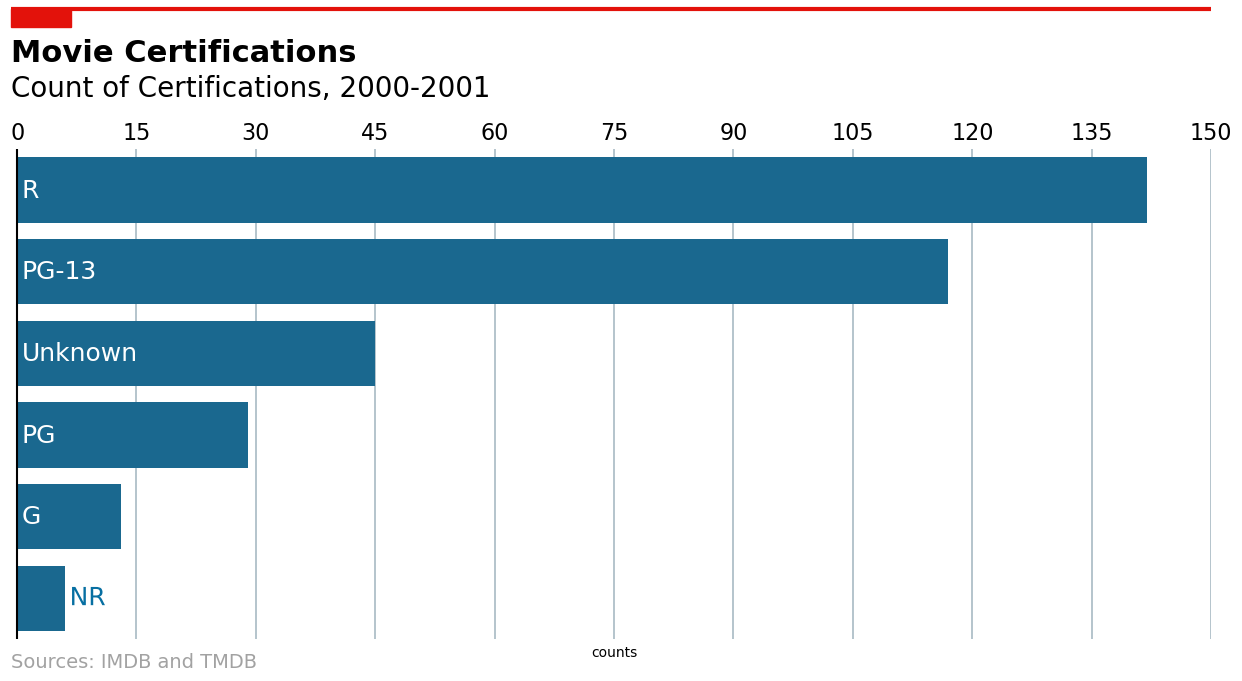

In [17]:
create_barplot(y, "counts", cert_counts.index, cert_counts,\
               'Count of Certifications', title='Movie Certifications')

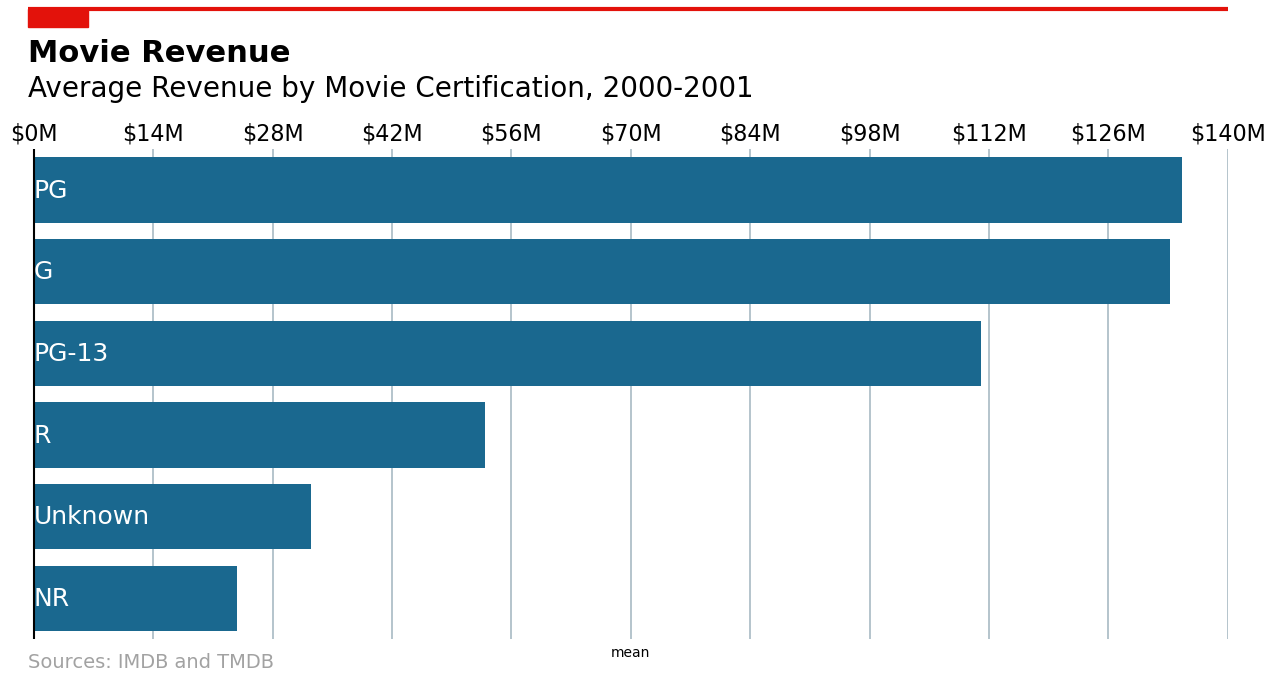

In [18]:
create_barplot(y, "mean", mean_rev.index, mean_rev,\
               'Average Revenue by Movie Certification', title='Movie Revenue')

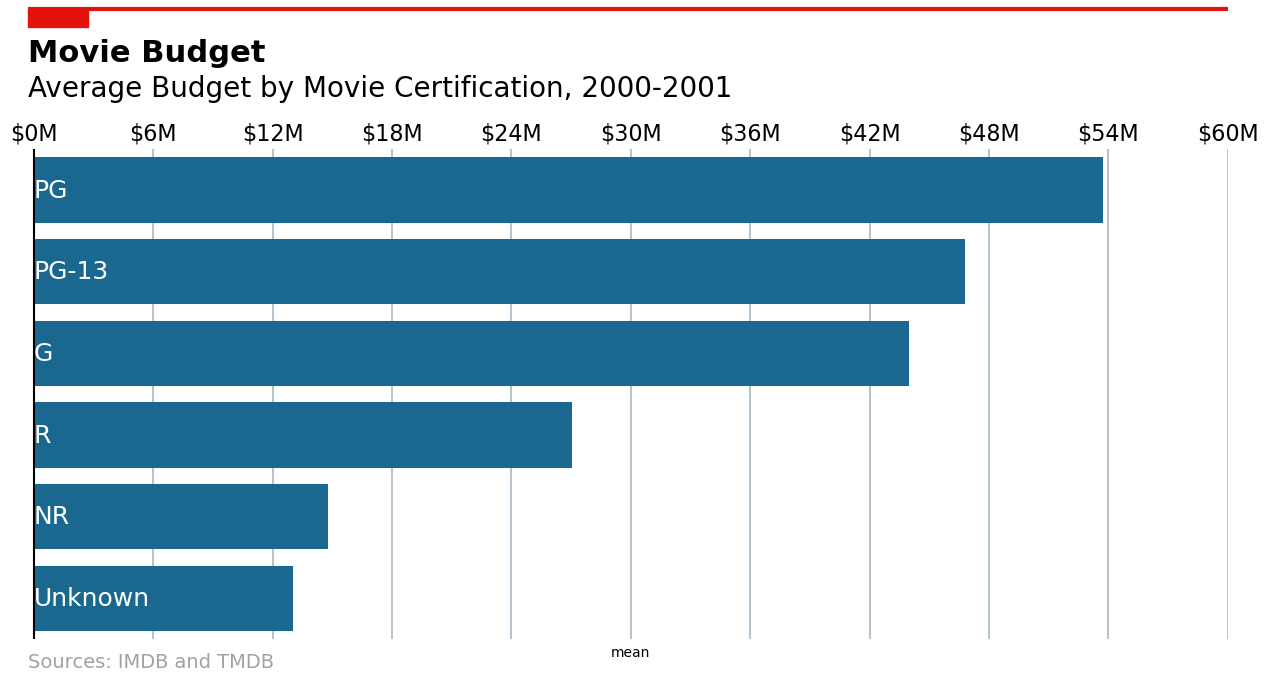

In [19]:
create_barplot(y, "mean", mean_bud.index, mean_bud,\
               'Average Budget by Movie Certification', title='Movie Budget')